---

- **interdisiplinary schools**
- **Fatemeh Jafari**

---

# **Practical Neuroimaging**

> **matplotlib**

> **seaborn**

> **nibabel**

> **Nilearn**



---

# -**matplotlib**

| Plot Type    | Function    | Common Parameters                                    |
| ------------ | ----------- | ---------------------------------------------------- |
| Line Plot    | `plot()`    | `color`, `linestyle`, `linewidth`, `marker`, `label` |
| Scatter Plot | `scatter()` | `color`, `s`, `marker`, `alpha`, `cmap`              |
| Bar Plot     | `bar()`     | `width`, `color`, `align`                            |
| Histogram    | `hist()`    | `bins`, `color`, `density`, `alpha`                  |
| Box Plot     | `boxplot()` | `vert`, `patch_artist`                               |
| Image Plot   | `imshow()`  | `cmap`, `vmin`, `vmax`, `interpolation`              |


---

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
from nilearn import plotting

In [3]:
trial = [1, 2, 3, 4, 5, 6]
first_block = [50, 51.7, 58.8, 68.8, 71.9, 77.9]
middle_block = [50, 78.8, 83, 84.2, 90.1, 92.7]
last_block = [50, 96.9, 97.8, 98.1, 98.8, 98.7]

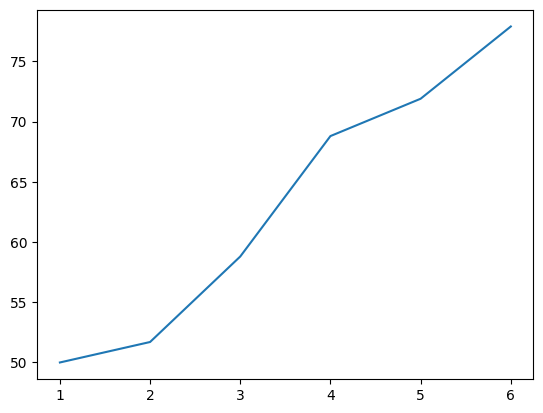

In [4]:
fig, ax = plt.subplots()
ax.plot(trial, first_block)
plt.show()

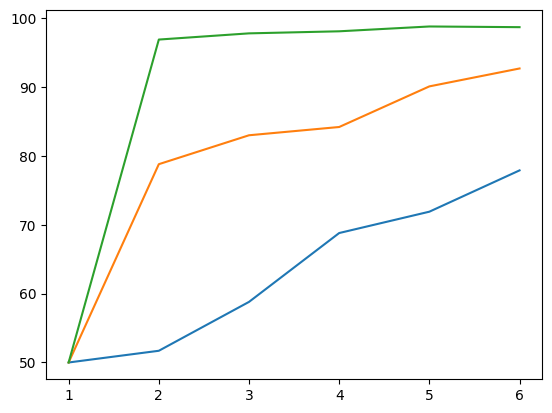

In [5]:
fig, ax = plt.subplots()
ax.plot(trial, first_block)
ax.plot(trial, middle_block)
ax.plot(trial, last_block)
plt.show()

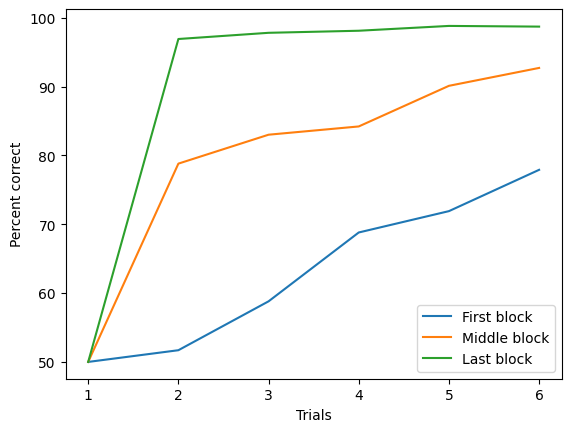

In [6]:
fig, ax = plt.subplots()
ax.plot(trial, first_block, label="First block")
ax.plot(trial, middle_block, label="Middle block")
ax.plot(trial, last_block, label="Last block")
ax.legend()
ax.set_xlabel("Trials")
ax.set_ylabel("Percent correct")
plt.show()

Text(0.5, 1.0, 'Harlow, 1949')

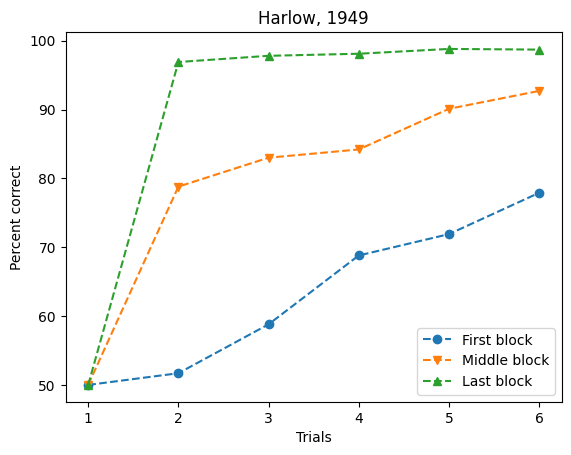

In [7]:
fig, ax = plt.subplots()
ax.plot(trial, first_block, marker='o', linestyle='--', label="First block")
ax.plot(trial, middle_block, marker='v', linestyle='--', label="Middle block")
ax.plot(trial, last_block, marker='^', linestyle='--', label="Last block")
ax.set_xlabel("Trials")
ax.set_ylabel("Percent correct")
ax.legend()
ax.set_title("Harlow, 1949")

# - **Seaborn**


- Seaborn is a Python data visualization library built on top of Matplotlib.

- It’s designed for statistical data visualization — great for summarizing relationships, distributions, and trends in your neuroimaging results.

- In neuroimaging, it’s not used for showing brain slices (that’s NiBabel, Nilearn, or Matplotlib’s imshow),
but it’s excellent for analyzing tabular outputs from processing pipelines like:

     - fMRI GLM results summaries

     - Behavioral correlations with brain metrics

     - Quality control metrics (e.g., motion parameters)

     - Group-level statistics

| **Step**                  | **Tool**             | **Example**                                             |
| ------------------------- | -------------------- | ------------------------------------------------------- |
| Raw MRI/fMRI loading      | NiBabel              | `nib.load()`                                            |
| Brain maps & connectivity | Nilearn              | `plot_glass_brain()`                                    |
| Statistical summaries     | **Seaborn**          | `sns.violinplot()` to compare ROI values between groups |
| Publication-ready plots   | Matplotlib + Seaborn | Customized figures for papers                           |


| **Seaborn Plot**    | **Neuroimaging Example**                                       |
| ------------------- | -------------------------------------------------------------- |
| `sns.histplot()`    | Histogram of mean BOLD signal per ROI                          |
| `sns.violinplot()`  | Group comparison of hippocampal volume (patients vs controls)  |
| `sns.boxplot()`     | Distribution of motion parameters across sessions              |
| `sns.scatterplot()` | Correlation between reaction time and prefrontal activation    |
| `sns.heatmap()`     | ROI × ROI functional connectivity matrix                       |
| `sns.lineplot()`    | HRF time course averaged over trials                           |
| `sns.pairplot()`    | Explore relationships between multiple brain-behavior measures |


# Scatter Plots

<Axes: xlabel='Handedness', ylabel='IQ'>

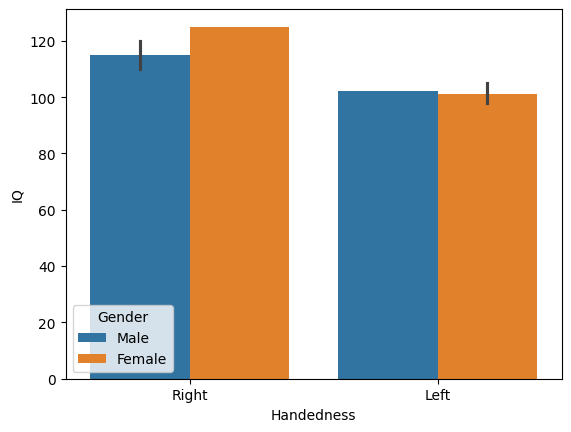

In [8]:
import pandas as pd

subjects = pd.DataFrame({
    "Handedness": ["Right", "Left", "Right", "Left", "Right", "Left", "Right", "Left"],
    "IQ": [110, 102, 125, 98, 115, 105, 120, 100],
    "Gender": ["Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female"]
})



sns.barplot(data=subjects, x="Handedness", y="IQ", hue= "Gender")

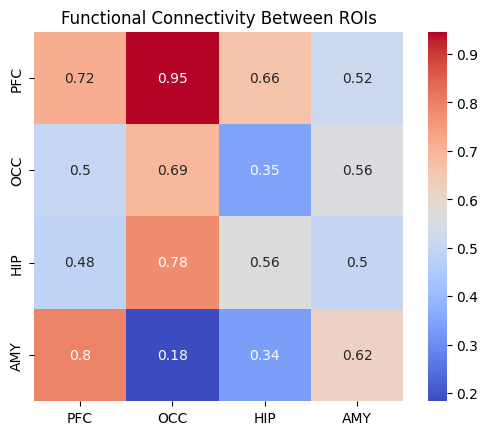

In [46]:
import numpy as np
import pandas as pd

# Example: simulated ROI connectivity matrix
rois = ["PFC", "OCC", "HIP", "AMY"]
data = np.random.rand(4, 4)
df = pd.DataFrame(data, index=rois, columns=rois)

# Plot heatmap
sns.heatmap(df,annot=True, cmap="coolwarm", square=True)
plt.title("Functional Connectivity Between ROIs")
plt.show()


# swarmplot

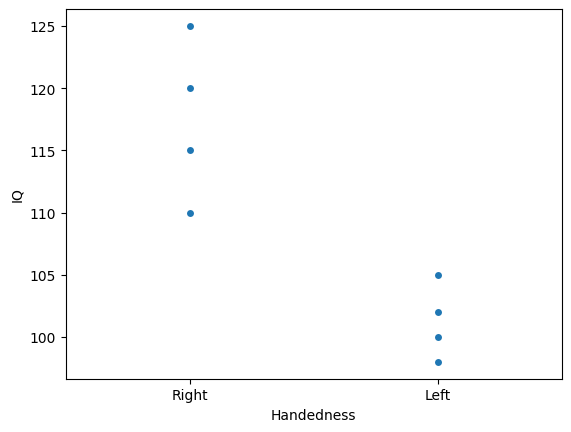

In [10]:
fig, ax = plt.subplots()
g = sns.swarmplot(data=subjects, x="Handedness", y="IQ")


# violinplot

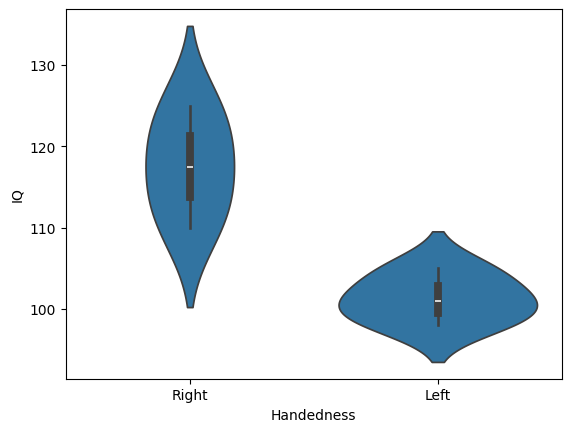

In [11]:
fig, ax = plt.subplots()
g = sns.violinplot(data=subjects, x="Handedness", y="IQ")

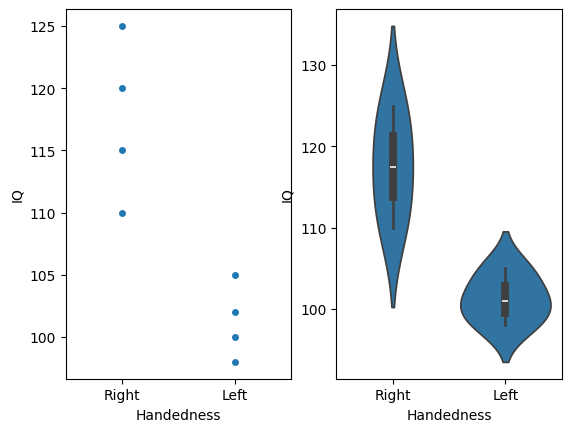

In [12]:
fig, ax = plt.subplots(1, 2)
g = sns.swarmplot(data=subjects, x="Handedness", y="IQ", ax=ax[0])
g = sns.violinplot(data=subjects, x="Handedness", y="IQ", ax=ax[1])

# Boxplot

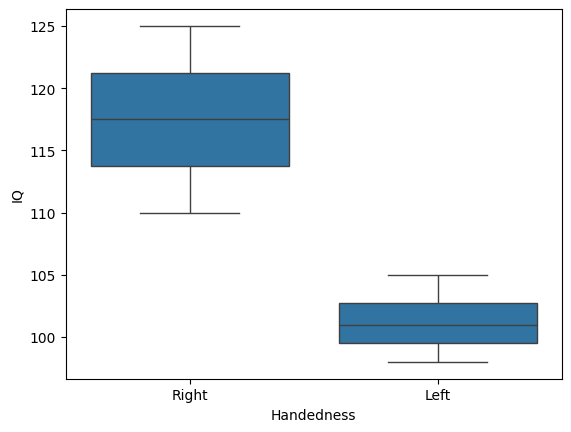

In [13]:
g = sns.boxplot(data=subjects, x="Handedness", y="IQ")

# lmplot

# Image Data

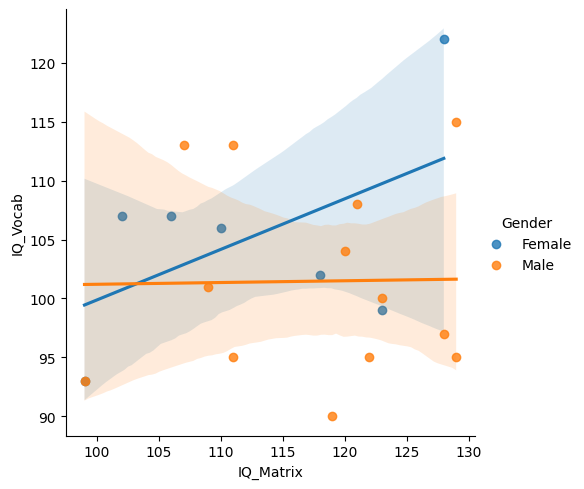

In [14]:
import pandas as pd
import numpy as np

subjects = pd.DataFrame({
    "IQ_Matrix": np.random.randint(90, 130, size=20),   
    "IQ_Vocab": np.random.randint(85, 125, size=20),   
    "Gender": np.random.choice(["Male", "Female"], size=20)  
})



g = sns.lmplot(data=subjects, x="IQ_Matrix", y="IQ_Vocab", hue="Gender")





---


## **Visulaize data using Nilearn(use the Nifti image)**

- **Nilearn is a Python library for neuroimaging analysis. It is mainly used for:**

> 1. Visualization – Plot brain images easily.

> 2. Preprocessing – Prepare fMRI data for analysis.

> 3. Statistical Analysis – Run machine learning on brain images.

> 4. General Linear Model (GLM) – Model brain activation based on events.

> 5. Connectivity Analysis – Study brain networks.


| Task                       | Nilearn Function              |
| -------------------------- | ----------------------------- |
| Load fMRI/NIfTI file       | `image.load_img()`            |
| Smooth/Resample/Mean       | `image.smooth_img()` etc.     |
| Plot anatomical/functional | `plot_anat()`, `plot_epi()`   |
| Plot activation map        | `plot_stat_map()`             |
| Extract time series        | `NiftiMasker`, `LabelsMasker` |
| Use standard atlas         | `datasets.fetch_atlas_*`      |
| View interactively         | `view_img()`                  |


In [15]:
img_t1 = nib.load(r'F:\neurotasks\interdisciplinary schools\2025-mentoring\python\sess5\sub-01\anat\sub-1_T1w_defaced.nii')
bold = nib.load(r'F:\neurotasks\interdisciplinary schools\2025-mentoring\python\sess5\sub-01\func\sub-1_task-objectviewing_run-01_bold.nii')
data_bold = bold.get_fdata()
data_t1=img_t1.get_fdata()



In [16]:
data_t1.shape

(124, 256, 256)

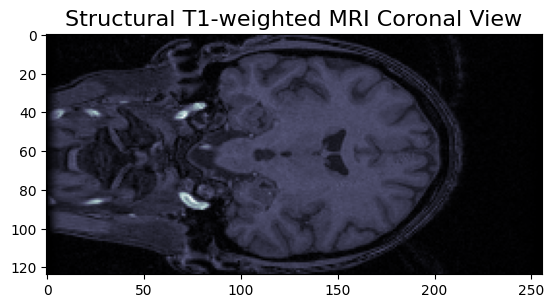

In [ ]:
# structural data

# Get middle slices in all three planes (sagittal, coronal, axial)
slice_coronal = data_t1[:, data_t1.shape[1] // 2, :]  # Y-axis slice


# Plot coronal view
plt.imshow(slice_coronal, cmap="bone")


plt.title("Structural T1-weighted MRI Coronal View", fontsize=16)
plt.show()


Coordinates system used in the space of the MRI volume, in millimeters:

Axis X: left to right

Axis Y: posterior to anterior

Axis Z: inferior to superior


| View Plane             | Slice Direction          | What You Actually See                                            | Common Use in Neuroimaging                                                             | Anatomical Plane | Axis Perpendicular to the Slice |
|------------------------|--------------------------|------------------------------------------------------------------|----------------------------------------------------------------------------------------|------------------|---------------------------------|
| **Axial** (Transverse) | Inferior ↔ Superior      | Horizontal slices (as if looking **from the feet up** toward the head) | Default view for most fMRI activation maps, structural scans, and group analyses      | **XY plane**     | **Z-axis**                      |
| **Sagittal**           | Left ↔ Right             | Cuts the brain into left and right halves; you see the side profile | Excellent for midline structures (corpus callosum, brainstem, cingulate gyrus)         | **YZ plane**     | **X-axis**                      |
| **Coronal**            | Anterior ↔ Posterior    | Frontal slices (as if looking **from the front of the face** toward the back) | Ideal for hippocampus, amygdala, ventricles, anterior–posterior relationships         | **XZ plane**     | **Y-axis**                      |

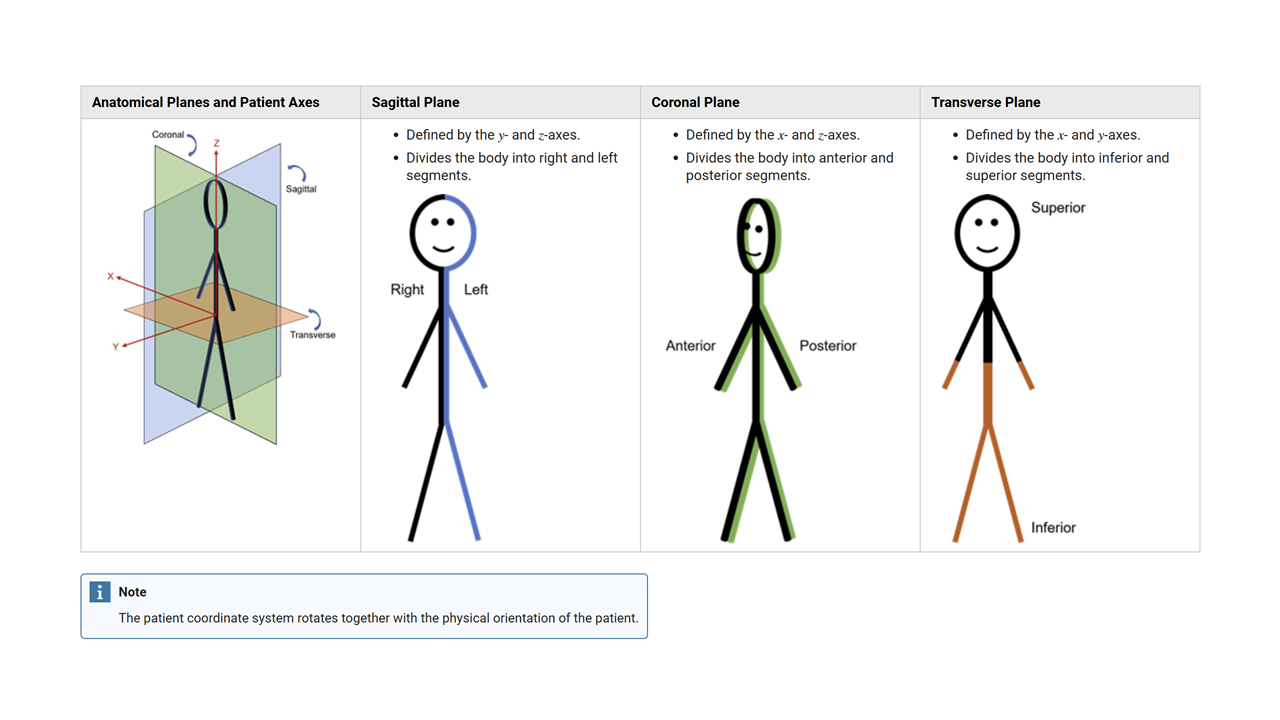

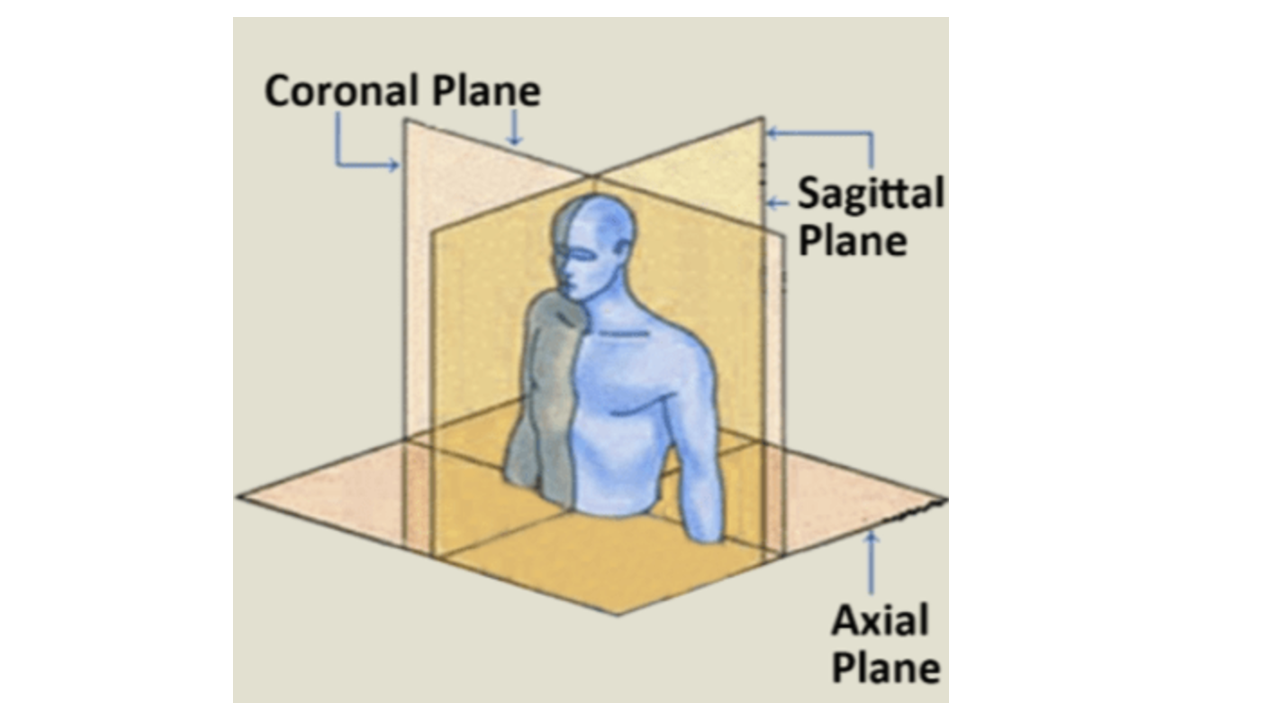

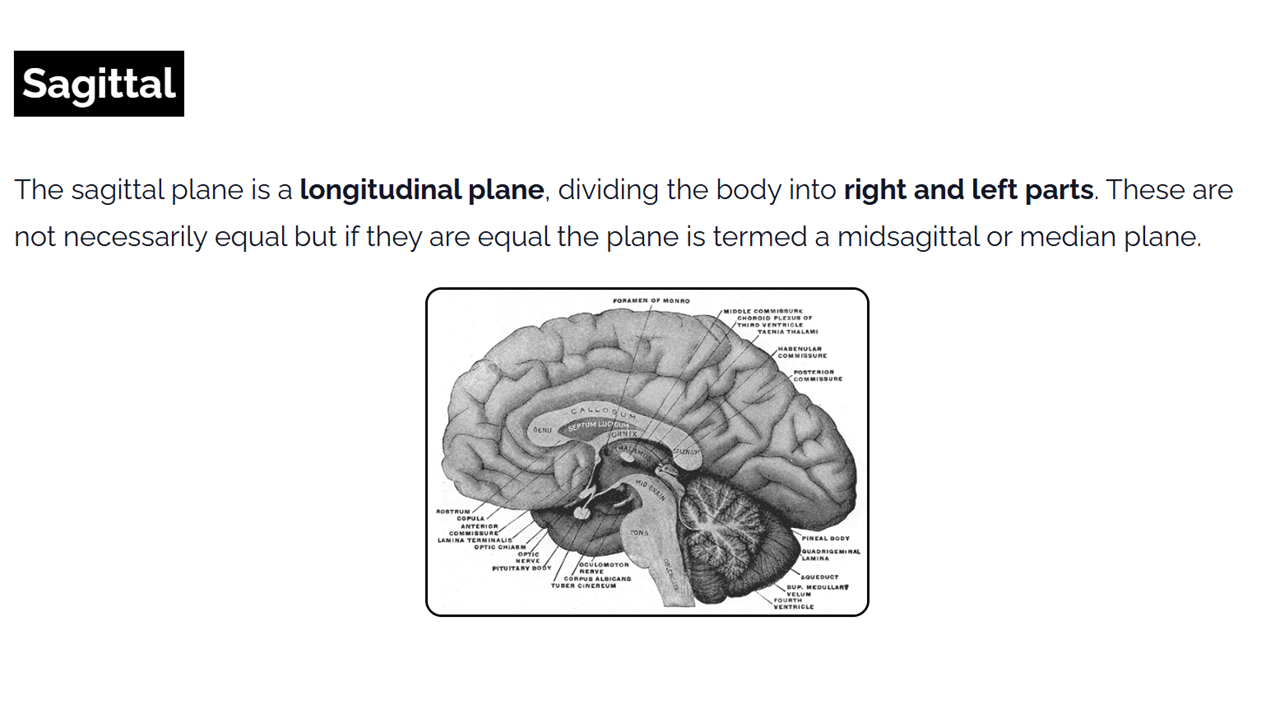

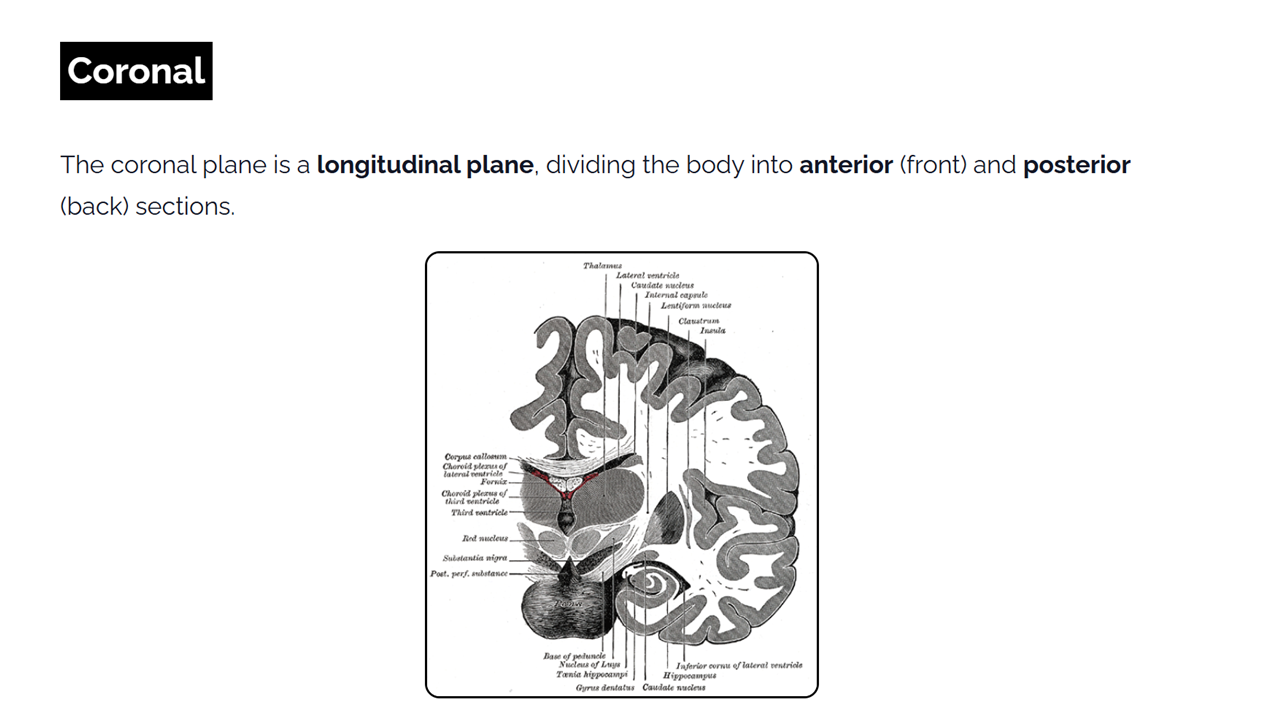

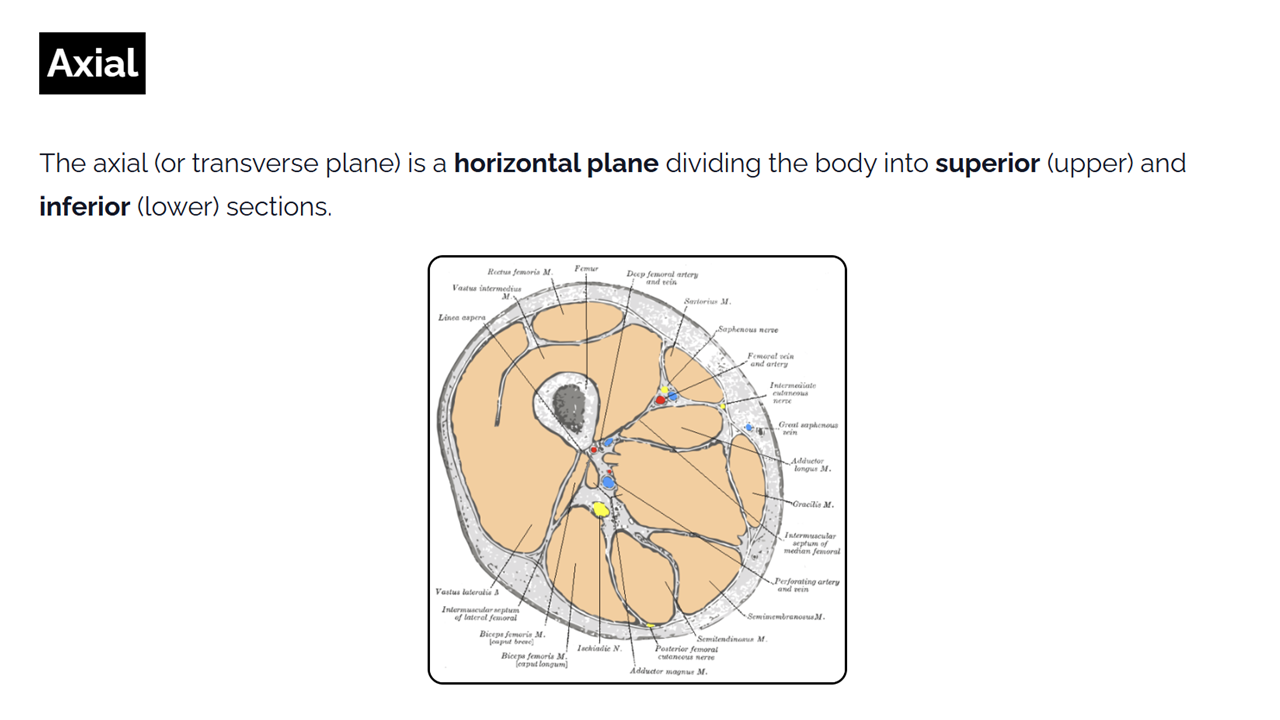

In [15]:
from IPython.display import Image, display
display(Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation5\Slide4.PNG', width= 1000)) 
display(Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation5\Presentation5.png', width= 1000))  
display(Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation5\Slide1.PNG', width= 1000))  
display(Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation5\Slide2.PNG', width= 1000))  
display(Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation5\Slide3.PNG', width= 1000))  



In [18]:
data_bold.shape

(40, 64, 64, 121)

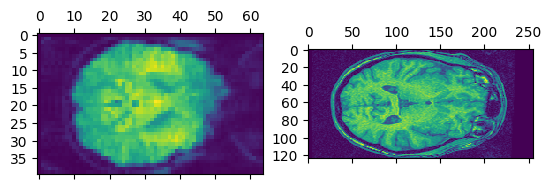

In [19]:

data_bold_t0 = data_bold[:, :, :, 0]

fig, ax = plt.subplots(1, 2)
ax[0].matshow(data_bold_t0[:, :, data_bold_t0.shape[-1]//2])
ax[1].matshow(data_t1[:, :, data_t1.shape[-1]//2])
plt.show()

- **What is plot_anat()?**

plot_anat() is a Nilearn plotting function for displaying anatomical MRI images.

plot_anat is mainly for showing a structural MRI as a background. You can control which slices, how bright, which orientation, and with what style.



| **Parameter**     | **What It Means**                                                                     | **Why/When to Use**                                                           | **Example**                              |
| ----------------- | ------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------- | ---------------------------------------- |
| **anat\_img**     | The anatomical image (e.g., T1-weighted MRI) to display.                              | This is the background image for visualization. Without it, nothing is shown. | `"sub-01_T1w.nii.gz"`                    |
| **cut\_coords**   | Where to “cut” the brain along the chosen view (MNI coordinates or number of slices). | Lets you focus on a specific region instead of showing the full brain.        | `cut_coords=(0, 0, 0)` or `cut_coords=7` |
| **output\_file**  | Path to save the plot as an image file.                                               | If you want to keep the figure instead of only displaying it.                 | `"anat_plot.png"`                        |
| **display\_mode** | Orientation/view: `"ortho"` (3 views), `"x"`, `"y"`, `"z"`, `"yx"`, etc.              | Choose how the brain is sliced for visualization.                             | `"ortho"`                                |
| **figure**        | Figure size or object.                                                                | To control plot size in notebooks or publications.                            | `figure=(10, 4)`                         |
| **axes**          | Specific Matplotlib axes to draw on.                                                  | For embedding plots in custom figures.                                        | Usually `None`                           |
| **title**         | Title text for the plot.                                                              | For clarity in presentations.                                                 | `"Subject 1 – Anatomy"`                  |
| **threshold**     | Intensity threshold (values below are transparent).                                   | Useful for highlighting high-intensity areas.                                 | `threshold=0.2`                          |
| **annotate**      | Whether to show coordinates and crosshairs (`True`/`False`).                          | Turn off if you want a cleaner figure.                                        | `annotate=True`                          |
| **black\_bg**     | If `True`, background is black; if `False`, it’s white.                               | Black background is often better for presentations.                           | `black_bg=True`                          |
| **dim**           | How much to darken the background (`0`=none, `1`=very dark).                          | Improves contrast when overlaying functional maps.                            | `dim=0.5`                                |
| **vmin / vmax**   | Minimum/maximum intensity for color scaling.                                          | Controls brightness and contrast.                                             | `vmin=0, vmax=200`                       |
| **cmap**          | Colormap for the image.                                                               | To change color style.                                                        | `"gray"`, `"hot"`, `"cool"`              |


In [20]:
import nibabel as nib
from nilearn import plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
img_t1 = nib.load(r'F:\neurotasks\interdisciplinary schools\2025-mentoring\python\sess5\sub-01\anat\sub-1_T1w_defaced.nii')
bold = nib.load(r'F:\neurotasks\interdisciplinary schools\2025-mentoring\python\sess5\sub-01\func\sub-1_task-objectviewing_run-01_bold.nii')
data_bold = bold.get_fdata()
t1_real = img_t1.get_fdata()

> **1. Show a Structural Scan with Custom Slices**

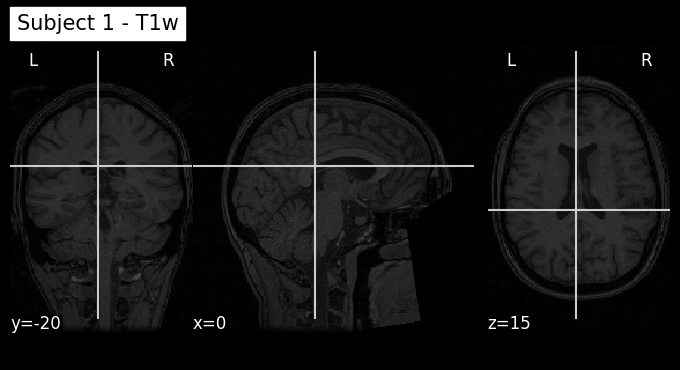

In [48]:
plotting.plot_anat(img_t1,
                   title='Subject 1 - T1w',
                   cut_coords=(0, -20, 15),
                   display_mode='ortho')
plotting.show()


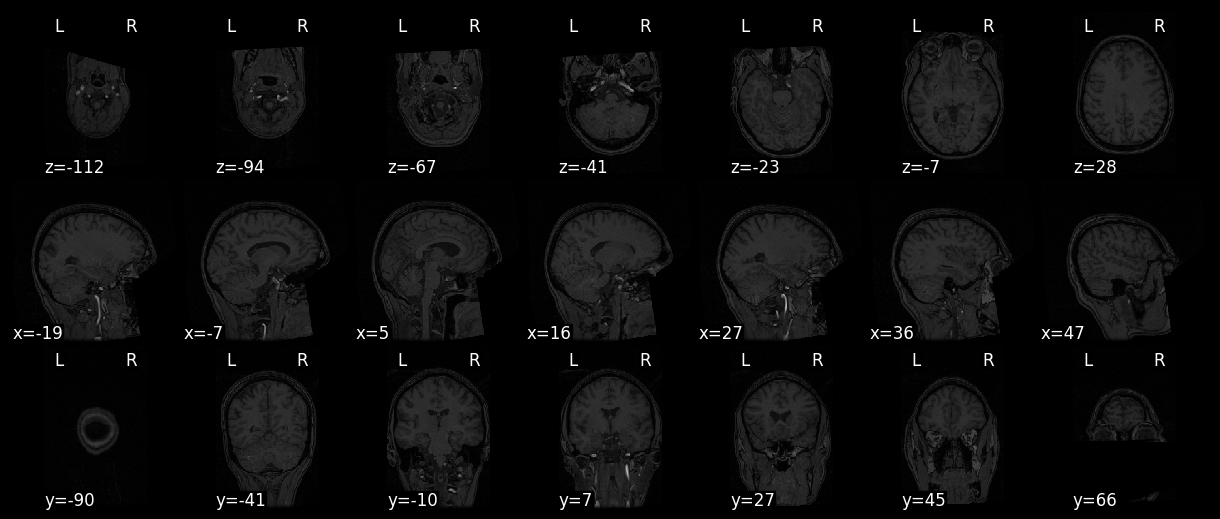

In [23]:
plotting.plot_anat(img_t1,  display_mode='mosaic', cut_coords= (7,7,7))

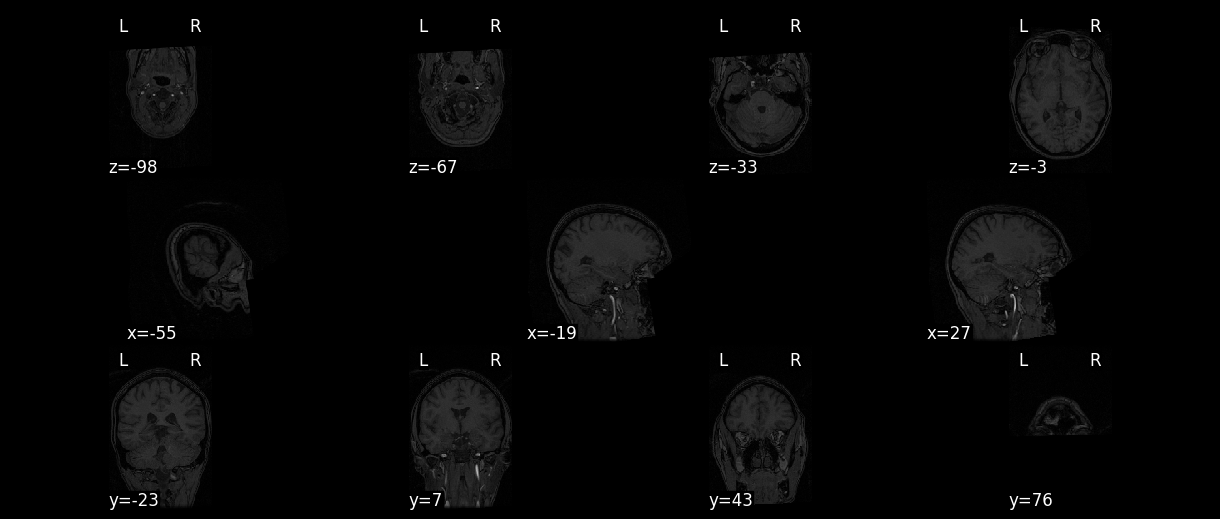

In [24]:
plotting.plot_anat(img_t1  , cut_coords = [3,4,4], display_mode = 'mosaic')

---

# **plot_epi()**

> is a visualization function in Nilearn used to display EPI (Echo Planar Imaging) images, which are the typical functional MRI (fMRI) scans.

- This will:

> Load an EPI (functional) NIfTI file

> Show slices of the brain in the three main orientations (sagittal, coronal, axial)

> Use an automatic colormap optimized for functional images (gray scale with good contrast)

**Main parameters**


| Parameter         | What it does                                                                                                                  | Why you use it                                                            |
| ----------------- | ----------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------- |
| **display\_mode** | Choose slice orientation(s): `'ortho'`, `'x'`, `'y'`, `'z'`, `'yx'`, etc.                                                     | `'ortho'` (default) shows 3 views together; single-letter shows one view. |
| **cut\_coords**   | Where to cut slices (in MNI space). Can be: <br>• `None` → auto <br>• an `int` → number of slices <br>• a list of coordinates | Lets you control exactly where you “slice” the brain.                     |
| **vmin / vmax**   | Minimum and maximum intensity for colormap                                                                                    | Adjust contrast so activation patterns are visible.                       |
| **colorbar**      | `True`/`False` to show color scale                                                                                            | Useful if intensities matter in interpretation.                           |
| **black\_bg**     | `True` → black background <br>`False` → white background                                                                      | Black background often looks better for presentations.                    |
| **annotate**      | `True` → show coordinates on figure                                                                                           | Good for teaching or reproducibility.                                     |
| **draw\_cross**   | Show crosshairs at center                                                                                                     | Helps focus on a specific voxel location.                                 |
| **cut\_coords**   | `[x, y, z]` or number                                                                                                         | You can control exact slices or let Nilearn decide automatically.         |
| **axes**          | Matplotlib Axes                                                                                                               | Put multiple plots into one figure manually.                              |
| **figure**        | Matplotlib Figure                                                                                                             | Control figure size or reuse a figure.                                    |


In [25]:
img_t1 = nib.load(r'F:\neurotasks\interdisciplinary schools\2025-mentoring\python\sess5\sub-01\anat\sub-1_T1w_defaced.nii')
bold = nib.load(r'F:\neurotasks\interdisciplinary schools\2025-mentoring\python\sess5\sub-01\func\sub-1_task-objectviewing_run-01_bold.nii')
data_bold = bold.get_fdata()


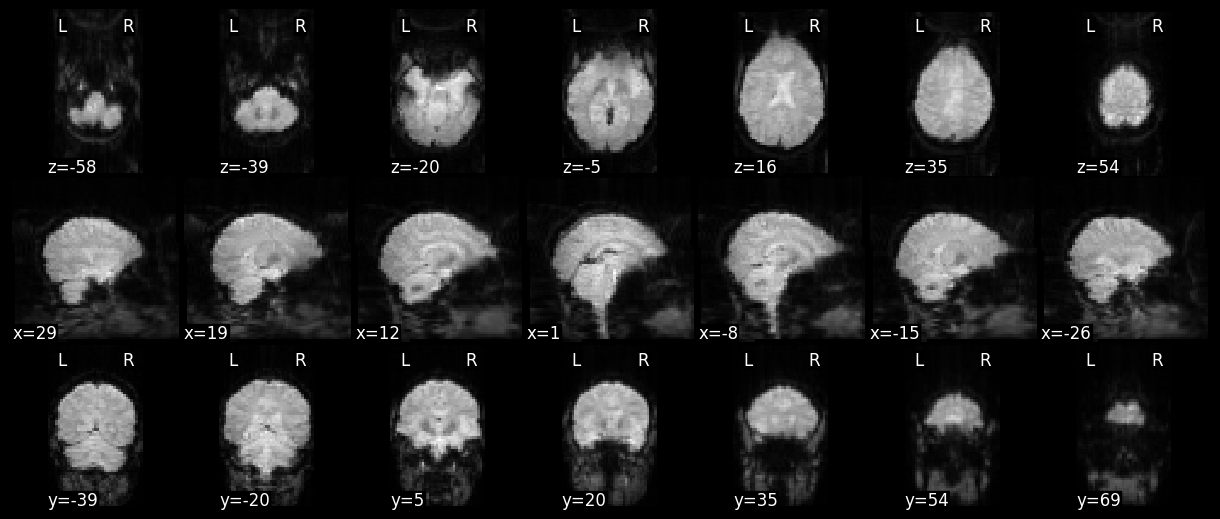

In [26]:
from nilearn.image import index_img


# Extract a single 3D volume from 4D fMRI data
volume_1 = index_img(bold, 1)  # Extracting the second volume (time index = 1)

# Plot the EPI image
plotting.plot_epi(volume_1, cut_coords=None, display_mode='mosaic', cmap="gray")

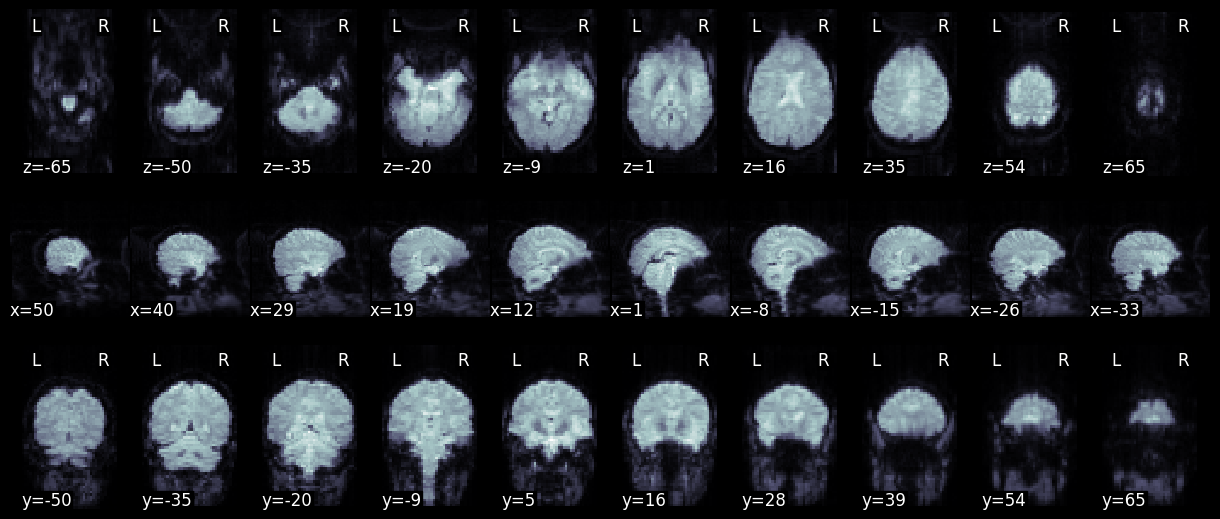

In [27]:
# Extract a single 3D volume from 4D fMRI data
volume_1 = index_img(bold, 1)  # Extracting the second volume (time index = 1)

# Plot the EPI image
plotting.plot_epi(volume_1, cut_coords=[10,10,10], display_mode='mosaic', cmap='bone')

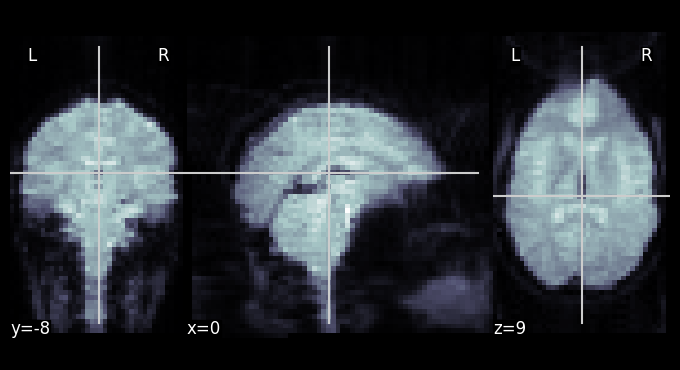

In [28]:
# Extract a single 3D volume from 4D fMRI data
volume_1 = index_img(bold, 1)  # Extracting the second volume (time index = 1)

# Plot the EPI image
plotting.plot_epi(volume_1, cmap='bone') #Default mode: Shows three orthogonal views (axial, sagittal, coronal).

---

# **nilearn.image?**

It provides functions for:

| Category                        | Function                    | Description                                                                 |
|---------------------------------|-----------------------------|-----------------------------------------------------------------------------|
| **Basic Image Operations**      | `mean_img()`                | Computes the mean image across the time dimension (4D → 3D)                 |
|                                 | `index_img()`               | Extracts a specific 3D volume from a 4D niimg                              |
|                                 | `swap_img_hemispheres()`    | Swaps left and right hemispheres of an image                               |
| **Resampling & Smoothing**      | `resample_img()`            | Resamples an image to a new space or voxel size                             |
|                                 | `smooth_img()`              | Applies Gaussian smoothing (FWHM in mm) to the image                        |
| **Mathematical & Statistical**  | `math_img()`                | Applies a custom mathematical formula to an image (e.g., thresholding)     |
|                                 | `threshold_img()`           | Thresholds an image (absolute, percent, or statistical thresholding)        |
|                                 | `concat_imgs()`             | Concatenates multiple 3D/4D images along the time axis into a single 4D image |
| **Masking & Signal Extraction** | `apply_mask()`              | Extracts voxel time-series inside a given brain mask                        |
|                                 | `clean_img()`               | Removes noise and confounds from fMRI data (detrending, filtering, etc.)    |

C:\Users\fjafa\AppData\Local\Temp\ipykernel_6284\1634060915.py:3: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  plotting.plot_epi(mean_img(bold), cut_coords=[10,10,10], display_mode='mosaic')


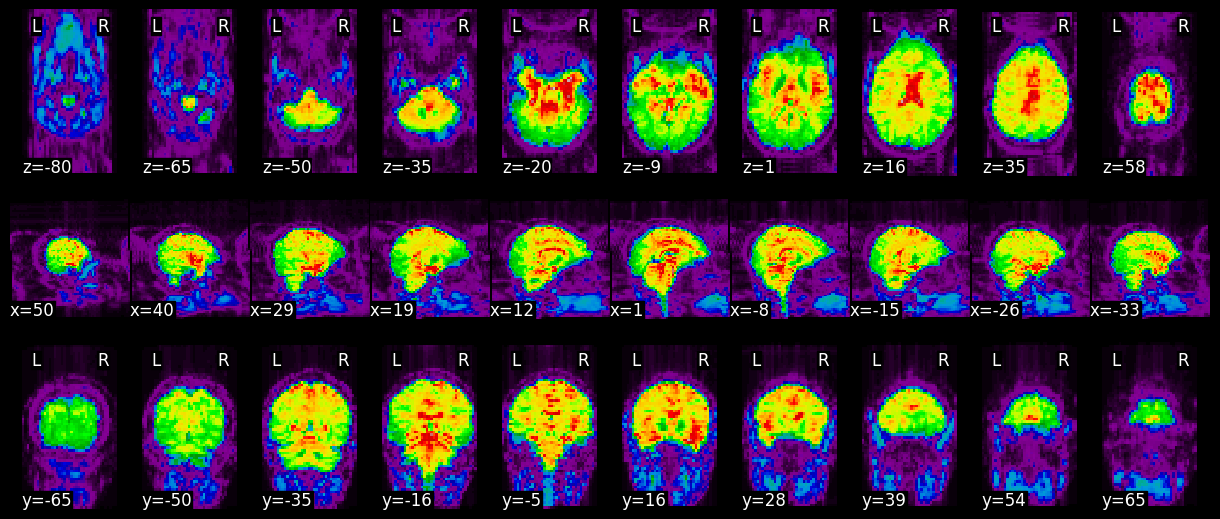

In [29]:
from nilearn.image import mean_img

plotting.plot_epi(mean_img(bold), cut_coords=[10,10,10], display_mode='mosaic')

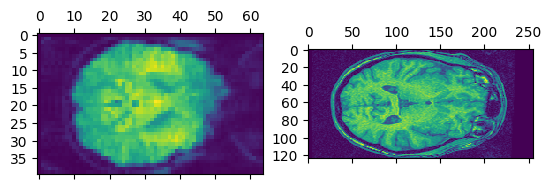

In [30]:


data_bold_t0 = data_bold[:, :, :, 0]
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2)
ax[0].matshow(data_bold_t0[:, :, data_bold_t0.shape[-1]//2])
im = ax[1].matshow(data_t1[:, :, data_t1.shape[-1]//2])

In [31]:
data_bold = bold.get_fdata()
data_bold.dtype  # Output: float64 (default data type used by NiBabel)

dtype('float64')

---


# **plot_img() Used For?**

> Visualizing structural MRI (T1-weighted, T2-weighted scans).

> Displaying functional MRI (fMRI) maps (statistical activations).

> Checking image quality, preprocessing, and alignment.

C:\Users\fjafa\AppData\Local\Temp\ipykernel_6284\3983015378.py:1: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  plotting.plot_img(mean_img(bold), cut_coords=[10,10,10], display_mode='mosaic', cmap='bone')


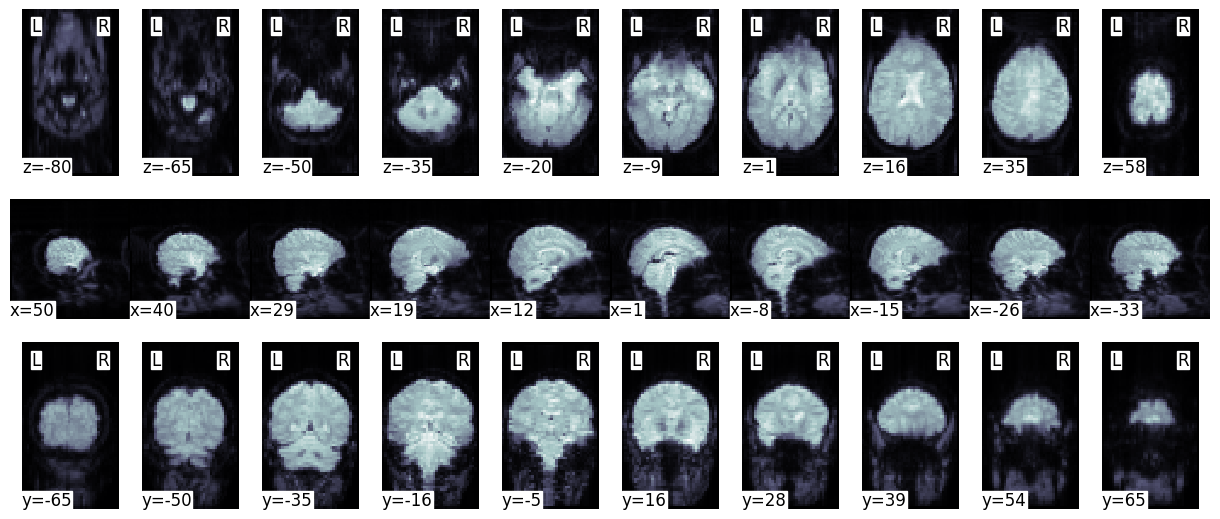

In [33]:
plotting.plot_img(mean_img(bold), cut_coords=[10,10,10], display_mode='mosaic', cmap='bone')


- **plot_anat( )**

> with mean fMRI

> you can overlay the mean fMRI signal onto an anatomical template.

In [34]:
plotting.plot_anat(mean_img(bold), cut_coords = [4,4,4], display_mode = 'mosaic')

C:\Users\fjafa\AppData\Local\Temp\ipykernel_6284\3063656120.py:1: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  plotting.plot_anat(mean_img(bold), cut_coords = [4,4,4], display_mode = 'mosaic')


# **extract and plot time series from a voxel**

> **analyze how brain activity changes in a specific region over time**

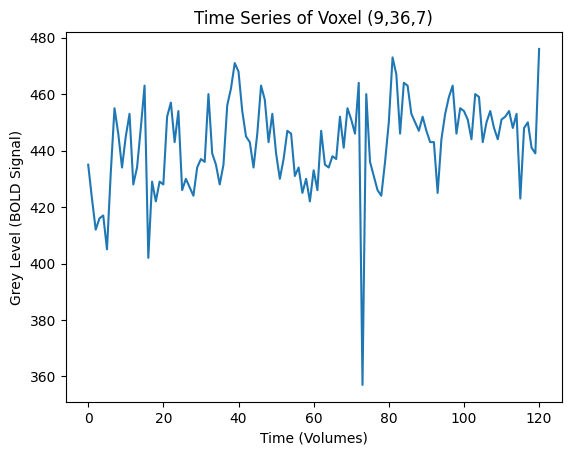

In [35]:
import matplotlib.pyplot as plt

img_bold = nib.load(r'F:\neurotasks\interdisciplinary schools\2025-mentoring\python\sess5\sub-01\func\sub-1_task-objectviewing_run-01_bold.nii')

data_bold = img_bold.get_fdata() 

# Select a voxel at coordinates (9,36,7)
voxel_time_series = data_bold[9,36,7,:]

# Plot the time series
plt.plot(voxel_time_series)
plt.title('Time Series of Voxel (9,36,7)')
plt.xlabel('Time (Volumes)')
plt.ylabel('Grey Level (BOLD Signal)')
plt.show()


---

#  **visualizing data quality using 'carprt_plot'**

> carprt_plot show global signal variation across the brain

> a way to visualize fMRI time series data from all voxels at once.

- **Imagine you have 4D fMRI data:**

     - 3D space (x, y, z voxels)

     - Time (TRs, or time points)

  **|** For each voxel, you have a signal intensity that changes over time.

  **|** In a carpet plot, you flatten the 3D spatial dimensions into rows (one row = one voxel or one ROI) and keep time on the x-axis.

  **|** The color in each cell represents the signal intensity at that time point for that voxel.

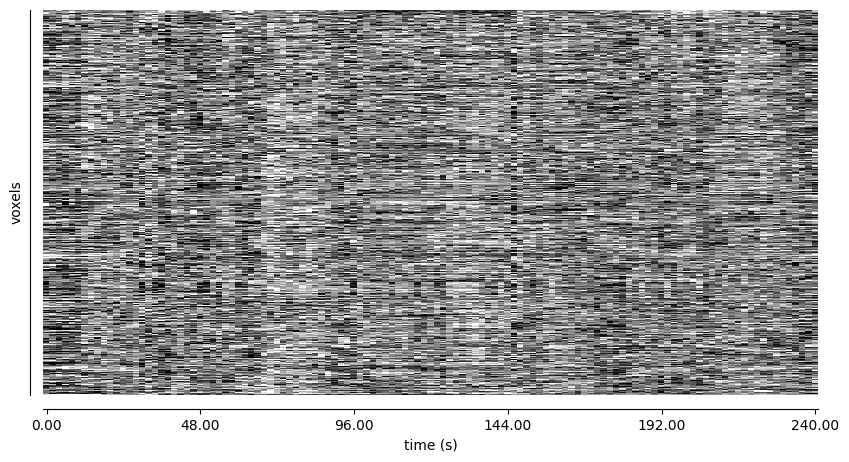

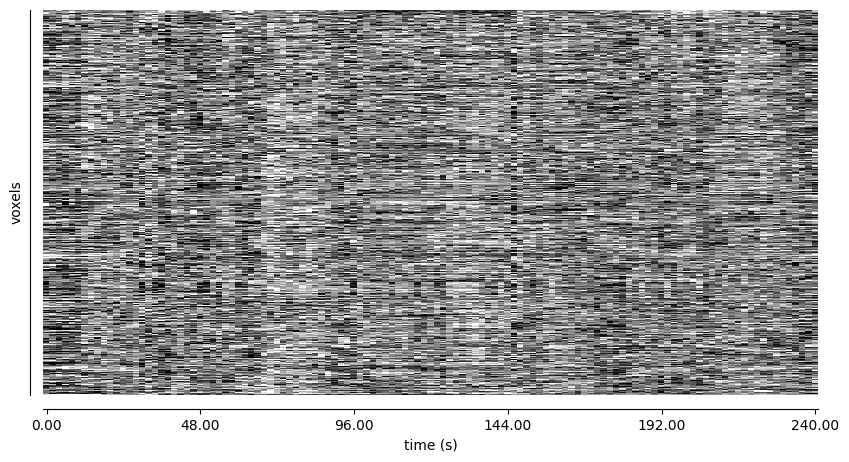

In [36]:
plotting.plot_carpet(img_bold, t_r=2)

- **Why it’s useful in neuroimaging**

> **Quality control (QC):** Quickly spot motion artifacts, drifts, or scanner issues.

> **Motion spikes:** Sudden changes in many voxels at the same time can indicate subject movement.

> **Global signal changes:** Widespread color shifts may reflect physiological noise or scanner drift

- **How motion artifacts appear in a carpet plot**

When a subject moves during scanning, many voxels' signals change abruptly at the same time point.

In the carpet plot, this shows up as:

> **Vertical stripes:** sudden changes across many voxels → looks like a sharp vertical line in the plot.

> **Consistent across tissue types:** gray matter, white matter, and CSF rows all show simultaneous color changes.

> **Often aligns with motion traces:** if you plot motion parameters (translation/rotation) under the carpet plot, these spikes match the stripes.



| **Visual Feature**                                     | **Possible Cause**                           | **Interpretation Tip**                                             |
| ------------------------------------------------------ | -------------------------------------------- | ------------------------------------------------------------------ |
| **Sharp vertical stripe across all rows**              | Sudden head movement                         | Motion spike — check corresponding time in motion parameters plot. |
| **Multiple parallel vertical stripes**                 | Repeated movements (nodding, fidgeting)      | Indicates unstable subject; may require motion scrubbing.          |
| **Stripes only in certain voxel groups (e.g., edges)** | Localized artifact or partial volume effects | Check if mask includes noisy voxels near skull or sinuses.         |
| **Overall block shift in color before/after stripe**   | Sustained head repositioning                 | Pre/post-stripe data may be in different spatial alignment.        |
| **High-frequency ‘fuzzy’ changes across entire plot**  | Scanner instability or vibration             | Less common — verify with phantom scans or hardware logs.          |
| **Color bands with gradual slopes**                    | Physiological noise (respiration, heartbeat) | Usually periodic; can be filtered with physiological regressors.   |


In [37]:
tr = img_bold.header.get_zooms()
tr

(np.float32(3.5), np.float32(3.75), np.float32(3.75), np.float32(2.5))

In [38]:
# Extract TR from the header
tr = img_bold.header.get_zooms()[3]  # The fourth value corresponds to TR

print(f"Repetition Time (TR): {tr} seconds")

Repetition Time (TR): 2.5 seconds


---

# **Assessing MRI Data Quality: Temporal Signal-to-Noise Ratio (tSNR)**


> Once the MRI data is loaded, it's important to assess its quality.

> The temporal Signal-to-Noise Ratio (tSNR) is a commonly used metric to assess the quality of fMRI data.

> The SNR measures how consistent the signal is over time for each voxel and can be used to detect motion artifacts or other issues in the data.

# **Calculating tSNR Using NumPy**

The simplest way to calculate tSNR is to use NumPy functions. We calculate the mean and standard deviation along the time axis (axis=-1), and then compute the ratio of the mean to the standard deviation.



In [39]:
import numpy as np

tsnr_numpy = np.mean(data_bold, -1) / np.std(data_bold, -1)


C:\Users\fjafa\AppData\Local\Temp\ipykernel_6284\3959804204.py:3: RuntimeWarning: invalid value encountered in divide
  tsnr_numpy = np.mean(data_bold, -1) / np.std(data_bold, -1)



- np.mean(data bold, -1): Computes the mean signal across the time points (i.e., over the last dimension of the array).

- np.std(data_bold, -1): Computes the standard deviation across the time points.

     > The result is a tSNR map where each voxel has a tSNR value.

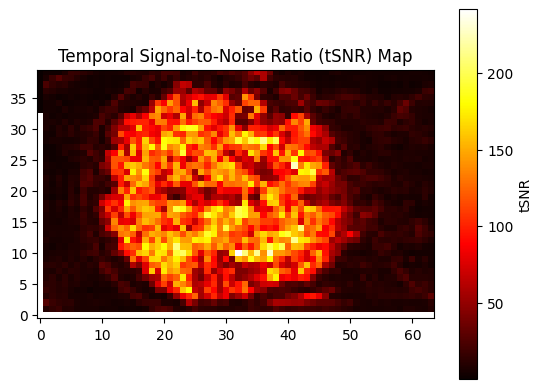

In [40]:
import matplotlib.pyplot as plt

# Select a middle slice for visualization
middle_slice = tsnr_numpy.shape[2] // 2
plt.imshow(tsnr_numpy[:, :, middle_slice], cmap="hot", origin="lower")
plt.colorbar(label="tSNR")
plt.title("Temporal Signal-to-Noise Ratio (tSNR) Map")
plt.show()


| pattern                                      | possible cause                                  | action                             |
| -------------------------------------------- | ----------------------------------------------- | ---------------------------------- |
| Uniformly high tSNR across most of the brain | Excellent signal quality                        | No issue                           |
| Low tSNR in specific areas (dark spots)      | Signal dropout, motion artifacts, or noise      | Check those areas for artifacts    |
| Extremely high tSNR in small regions         | Possible outliers or artifacts                  | Verify preprocessing steps         |
| Very low tSNR at edges                       | Susceptibility artifacts, field inhomogeneities | May be normal, but check alignment |








---

# **TASKS**

> # **Question 1 :**

**goals:** Basic practice with Matplotlib on neuroimaging data.

**Data:** File `session5.xlsx`

**Columns in the file**

* `subject_id`: subject identifier

* `diagnosis`: group (HC = healthy, MDD = depression)

* `age`: subject age

* `fd_mean_mm`: mean head motion (millimeters)

* `scrubbed_pct`: percentage of scrubbed slices (for motion control)

* `tsnr_pcc`: tSNR in the PCC region (fMRI signal quality)

* `t1_gm_ml`: gray matter volume from structural MRI (milliliters)

**you should do :**

     > 1. Load the file with Pandas and display the first 5 rows.

     > 2. Plot a simple histogram of the `fd_mean_mm` column.

     > 3. Plot a boxplot of the `tsnr_pcc` column for the two `diagnosis` groups.

     > 4. Plot a scatter plot between `fd_mean_mm` and `scrubbed_pct`.




> # **YOUR ANSWER:**

> 1. Load the file with Pandas and display the first 5 rows.


> 2. Plot a simple histogram of the `fd_mean_mm` column.


> 3. Plot a boxplot of the `tsnr_pcc` column for the two `diagnosis` groups.


> 4. Plot a scatter plot between `fd_mean_mm` and `scrubbed_pct`.


---

> ## **Question 2:**

Using the file `session5.xlsx`:

1. Create a **QC-filtered** subset that only keeps rows where `fd_mean_mm <= 0.20`.

2. Count the number of subjects in each group (`diagnosis`) within this subset (HC and MDD).

3. On this subset, draw a **boxplot** of the `tsnr_pcc` column grouped by `diagnosis`:

   * In the **plot title**, also include the count for each group in parentheses (e.g., `HC (n=..), MDD (n=..)`),

   * X-axis label: `Diagnosis` and Y-axis label: `tsnr_pcc`.



---

> # **Question 3 :**



**Data:** File `session5_seaborn.xlsx`

**Columns:**

* `subject_id`: subject identifier

* `diagnosis`: group (HC or MDD)

* `task`: task type (Rest or Emo)

* `site`: scanning site (A or B)

* `fd_mean_mm`: mean head motion

* `tsnr_pcc`: tSNR in the PCC region
* `gm_volume_ml`: gray matter volume (ml)



### Steps

1. **Load and Preview Data**

   * Read the file.
   * Display the first 5 rows, but only the columns `diagnosis`, `task`, `fd_mean_mm`.


2. **Violinplot of tSNR (PCC) by Diagnosis**

   * Use `sns.violinplot` to compare `tsnr_pcc` between HC and MDD groups.

3. **Pointplot of Mean Head Motion by Site and Diagnosis**

   * Use `sns.pointplot` to display the mean `fd_mean_mm` across the two sites (A, B), split by diagnosis.

4. **Stripplot of tSNR (PCC) by Site**

   * Use `sns.stripplot` to show `tsnr_pcc` data points by site.

5. **Heatmap of Correlation Matrix**

   * Use `.corr()` to compute correlations between numeric columns (`fd_mean_mm`, `tsnr_pcc`, `gm_volume_ml`).
   * Plot this matrix with `sns.heatmap` and display the values inside the cells.




> # **YOUR ANSWER:**


1. **Load and Preview Data**

   * Read the file.
   * Display the first 5 rows, but only the columns `diagnosis`, `task`, `fd_mean_mm`.



2. **Violinplot of tSNR (PCC) by Diagnosis**

   * Use `sns.violinplot` to compare `tsnr_pcc` between HC and MDD groups.


3. **Pointplot of Mean Head Motion by Site and Diagnosis**

   * Use `sns.pointplot` to display the mean `fd_mean_mm` across the two sites (A, B), split by diagnosis.

4. **Stripplot of tSNR (PCC) by Site**

   * Use `sns.stripplot` to show `tsnr_pcc` data points by site.


5. **Heatmap of Correlation Matrix**

   * Use `.corr()` to compute correlations between numeric columns (`fd_mean_mm`, `tsnr_pcc`, `gm_volume_ml`).
   * Plot this matrix with `sns.heatmap` and display the values inside the cells.

---

> # **Question 4 :**

## **Data** 

1. **Structural  and Functional from `defaced dataset`**  


---

## **Steps**

1. Load both files (T1 and fMRI) with `nilearn.image.load_img` and convert them to NumPy arrays with `get_fdata()`:

2. Create **mid-slices of T1** in three planes using simple NumPy indexing; then display **only the axial view** with `imshow`:

3. Extract **time frame 10 from fMRI**: `data_bold_t10`.

4. Use `plt.subplots()` to create two side-by-side panels, and display the **central axial slice** from `data_bold_t10` and `data_t1` with `matshow`.




1. Load both files (T1 and fMRI) with `nilearn.image.load_img` and convert them to NumPy arrays with `get_fdata()`:


2. Create **mid-slices of T1** in three planes using simple NumPy indexing; then display **only the axial view** with `imshow`:


3. Extract **time frame 10 from fMRI**: `data_bold_t10`.


4. Use `plt.subplots()` to create two side-by-side panels, and display the **central axial slice** from `data_bold_t10` and `data_t1` with `matshow`.


---

> # **Question 5 :**

**Goal**: Working with `plot_anat` using anat folder 


* Dataset: FLANKER 



### **Step 1 — Controlling Slices and Display Mode**

1. Display the image, with `display_mode="z"`.

2. Provide a **numeric** value for `cut_coords` to show 8 axial slices.

3. To improve contrast, set `dim=0.5` and `cmap="gray"`.

4. Control figure size with `figure=(10, 4)`.



### **Step 2 — Beautifying and Saving the Output**

1. Try black background (`black_bg=True`) and apply a simple `threshold` (e.g., `threshold=0.5`) to mask out low intensities.

2. Control brightness with `vmin`/`vmax` (e.g., `vmin=10, vmax=500`).

3. Save the output with `output_file="anat_plot.png"`.




> # **YOUR ANSWER :**



### **Stage 1 — Controlling Slices and Display Mode**

1. Display the image, with `display_mode="z"`.

2. Provide a **numeric** value for `cut_coords` to show 8 axial slices.

3. To improve contrast, set `dim=0.5` and `cmap="gray"`.

4. Control figure size with `figure=(10, 4)`.

### **Stage 2 — Beautifying and Saving the Output**

1. Try black background (`black_bg=True`) and apply a simple `threshold` (e.g., `threshold=0.5`) to mask out low intensities.

2. Control brightness with `vmin`/`vmax` (e.g., `vmin=10, vmax=500`).

3. Save the output with `output_file="anat_plot.png"`.


---

> ## **Question 6:**


**Goal**: Working with `plot_epi`

DATASET = `FLANKER `

## **Step 1 — Controlling Slices and Contrast**

**Goal:** Define the number of slices and adjust contrast so that patterns are more visible.

1. Load the BOLD file with `nilearn.image.load_img`, with `display_mode="z"`:

2. Instead of coordinates, provide a **number** for `cut_coords` (e.g., `cut_coords=6`) to show 6 axial slices.

3. Adjust contrast with `vmin`/`vmax` (e.g., `vmin=-2000, vmax=2000`) and enable `colorbar=True`.


## **Step 2 — Precise Coordinates + Crosshair + Figure Control**

**Goal:** Specify exact slicing planes (MNI coordinates) and show a crosshair.

1. Provide a list of coordinates for `cut_coords` (e.g., `[0, 20, 30]`).

2. Enable `draw_cross=True` to place a crosshair at the center of the view.

3. If you want to control the figure size, create a Figure with `matplotlib` and pass it via the `figure=` parameter to `plot_epi`.



> ## **YOUR ANSWER:**


## **Step 1 — Controlling Slices and Contrast**

**Goal:** Define the number of slices and adjust contrast so that patterns are more visible.

1. Load the BOLD file with `nilearn.image.load_img`, with `display_mode="z"`:

2. Instead of coordinates, provide a **number** for `cut_coords` (e.g., `cut_coords=6`) to show 6 axial slices.

3. Adjust contrast with `vmin`/`vmax` (e.g., `vmin=-2000, vmax=2000`) and enable `colorbar=True`.

## **Step 2 — Precise Coordinates + Crosshair + Figure Control**

**Goal:** Specify exact slicing planes (MNI coordinates) and show a crosshair.

1. Provide a list of coordinates for `cut_coords` (e.g., `[0, 20, 30]`).

2. Enable `draw_cross=True` to place a crosshair at the center of the view.

3. If you want to control the figure size, create a Figure with `matplotlib` and pass it via the `figure=` parameter to `plot_epi`.

---

> # **Question 7:**

**Required Data**

*  a BOLD file from `defaced` dataset file


## **Step 1 — Carpet Plot of the Full fMRI**

* Load the BOLD file
* create a simple carpet plot.



## **Step 2 — Compute and Display tSNR**

* Convert the 4D data to a NumPy array with `get_fdata()`.

* Compute **tSNR** exactly.

* Display a central axial slice of `tsnr_numpy`.



> # **YOUR ANSWER:**



## **Step 1 — Carpet Plot of the Full fMRI**

* Load the BOLD file
* create a simple carpet plot.

## **Step 2 — Compute and Display tSNR**

* Convert the 4D data to a NumPy array with `get_fdata()`.

* Compute **tSNR** exactly.

* Display a central axial slice of `tsnr_numpy`.


